See [my other Goodreads data project](https://www.kaggle.com/ruthrootz/my-goodreads-reading-data) that shows how much I read.

# import data

In [ ]:
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# books from my Goodreads shelves
books = pd.read_csv('../input/goodreads-data-778-books/goodreads_library_export.csv')
# Goodreads book database with genres
genres = pd.read_json('../input/books-with-genres/goodreads_book_genres_initial.json', lines = True)
pd.set_option('display.max_columns', None)

In [ ]:
books.head()

In [ ]:
genres.head()

# clean genre data

In [ ]:
def convert_genres_to_list(genres):
    genres_as_list = []
    for genre_array in genres:
        list_of_chars = ''
        list_of_chars = [c for c in genre_array if c not in "'{}:1234567890"]
        removed_filler_characters = ''
        for c in list_of_chars:
            removed_filler_characters += c
        genres_as_list.append(removed_filler_characters)
    return genres_as_list


genres.genres = genres.genres.apply(convert_genres_to_list)
genres.head()

# what genres do I read?

In [ ]:
books_with_genres = pd.merge(books, genres, left_on = 'Book Id', right_on = 'book_id')
separated_genres = pd.DataFrame(columns = ['book_id', 'genre'])

for index, row in books_with_genres.iterrows():
    for genre in row.genres:
        if row['Read Count'] > 0:
            new_row = { 'book_id' : row.book_id, 'genre' : genre }
            separated_genres = separated_genres.append(new_row, ignore_index = True)

separated_genres

In [ ]:
separated_genres = separated_genres.groupby(['genre'], as_index = False).count().sort_values('book_id', ascending = False)
my_genres = separated_genres[(separated_genres['genre'] != 'fiction') & (separated_genres['genre'] != 'young-adult') & (separated_genres['genre'] != 'children')]

In [ ]:
my_genres.plot.pie(y = 'book_id', figsize = (10, 10), labels = my_genres.genre)

# what are the best books I've read?

I removed Calvin and Hobbes books from this list because they pretty much dominate the entire top 10 list.

In [ ]:
# sorted_best_to_worst = books[books['Read Count'] > 0].sort_values('Average Rating', ascending = False)
sorted_best_to_worst = books[(books['Read Count'] > 0) & (~books['Title'].str.contains('Calvin'))].sort_values('Average Rating', ascending = False)
top_ten_books = sorted_best_to_worst[:10]

plt.figure(figsize = (50, 10))
plt.title('best books I\'ve read')
sns.barplot(x = top_ten_books['Title'],y = top_ten_books['Average Rating'])

Notice that some of the highest rated books on Goodreads are ones that are either insanely popular or insanely unpopular.

# what are the worst books I've read?

In [ ]:
sorted_worst_to_best = books[(books['Read Count'] > 0) & (~books['Title'].str.contains('Calvin'))].sort_values('Average Rating')
bottom_ten_books = sorted_worst_to_best[:10]

plt.figure(figsize = (50, 10))
plt.title('worst books I\'ve read')
sns.barplot(x = bottom_ten_books['Title'],y = bottom_ten_books['Average Rating'])

Wow... Some of these books I actually really liked!

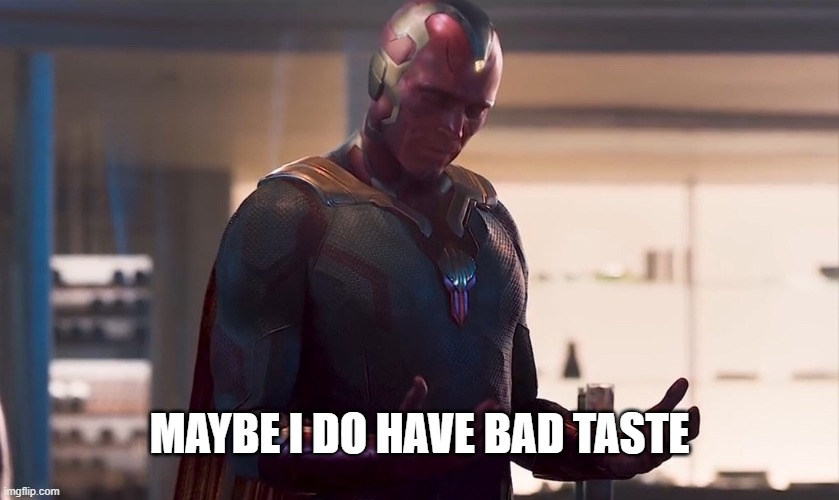

# sources

data source: https://github.com/MengtingWan/goodreads